# Analysis using `numpy` to fit your data

## Overview:
- **Teaching:** 10 min
- **Exercises:** 5 min

**Questions**
* How can I analyse data in pandas/python?

**Objectives**
* Be able to use the numpy method `polyfit` to fit data using polynomial or exponential functions.


## Reference: 

In addition to documentation/references given throughout, this episode draws on the material in https://towardsdatascience.com/regression-plots-with-pandas-and-numpy-faf2edbfad4f.

Generally it is good practice to import all libraries you will need at the tpo of your note book so that it your dependencies are clear:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

We are importing pandas, datetime, matplotlib.pyplot and numpy.  numpy is a numerical library which underpins the data structures used in pandas.  Here we are going to use the features of numpy to analyse the data.  First we will download the covid data again and extract a subset to analyse from the 'first wave'.

In [3]:
data_url='https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumCasesBySpecimenDate&metric=cumDeaths28DaysByDeathDate&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv'

In [8]:
covid_data=pd.read_csv(data_url)
covid_data.head()

,date,areaType,areaCode,areaName,cumCasesBySpecimenDate,cumDeaths28DaysByDeathDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate
0,2020-11-26,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN
1,2020-11-25,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN
2,2020-11-24,overview,K02000001,United Kingdom,1572057.0,56857.0,11242.0,300.0
3,2020-11-23,overview,K02000001,United Kingdom,1560815.0,56557.0,17798.0,360.0
4,2020-11-22,overview,K02000001,United Kingdom,1543017.0,56197.0,11729.0,407.0


As before we need to convert the date to a `datetime` format:

In [12]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

To focus on the first wave we will set start and end dates to 1st March 2020 and 1st June 2020:

In [13]:
start_date=datetime.datetime(year=2020,month=3,day=1)
end_date=datetime.datetime(year=2020,month=5,day=31)

As we saw earlier we can now use these to select a range of data

In [14]:
covid_wave1 = covid_data[covid_data['date'].between(start_date, end_date)]
covid_wave1.head()

,date,areaType,areaCode,areaName,cumCasesBySpecimenDate,cumDeaths28DaysByDeathDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate
179,2020-05-31,overview,K02000001,United Kingdom,256425.0,38128.0,1080.0,126.0
180,2020-05-30,overview,K02000001,United Kingdom,255345.0,38002.0,1121.0,163.0
181,2020-05-29,overview,K02000001,United Kingdom,254224.0,37839.0,1527.0,186.0
182,2020-05-28,overview,K02000001,United Kingdom,252697.0,37653.0,1756.0,217.0
183,2020-05-27,overview,K02000001,United Kingdom,250941.0,37436.0,1829.0,195.0


Let's now plot the number of daily cases against the date:

Text(0, 0.5, 'Daily Cases')

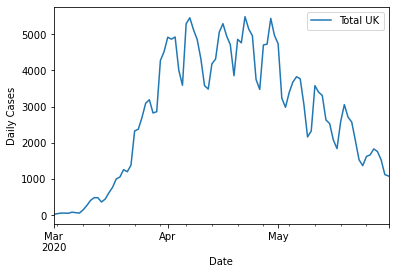

In [15]:
covid_wave1.plot(x='date', y='newCasesBySpecimenDate', label='Total UK')
plt.xlabel('Date')
plt.ylabel('Daily Cases')

This data is showing very different behaviour at different times so lets select a smaller range covering just March

In [16]:
start_date=datetime.datetime(year=2020,month=3,day=1)
end_date=datetime.datetime(year=2020,month=3,day=30)
covid_march = covid_data[covid_data['date'].between(start_date, end_date) ]

Text(0, 0.5, 'Daily Cases')

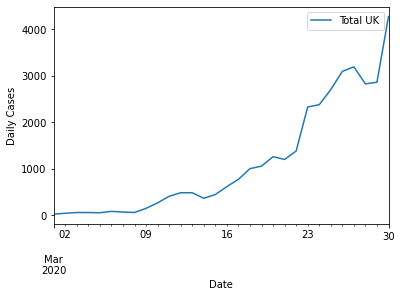

In [17]:
covid_march.plot(x='date', y='newCasesBySpecimenDate', label='Total UK')
plt.xlabel('Date')
plt.ylabel('Daily Cases')

Now we can generate a fit to the data.  There are many libraries such as scipy that we could use to do this see e.g. the [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) and [lectures](https://scipy-lectures.org/intro/scipy/auto_examples/plot_curve_fit.html) however we are going to use [numpy's `polyfit` function](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).

First we need to modify the dataset as it is currently in reverse time order:

In [18]:
covid_march.head()

,date,areaType,areaCode,areaName,cumCasesBySpecimenDate,cumDeaths28DaysByDeathDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate
241,2020-03-30,overview,K02000001,United Kingdom,33961.0,3764.0,4272.0,585.0
242,2020-03-29,overview,K02000001,United Kingdom,29689.0,3179.0,2858.0,507.0
243,2020-03-28,overview,K02000001,United Kingdom,26831.0,2672.0,2822.0,436.0
244,2020-03-27,overview,K02000001,United Kingdom,24009.0,2236.0,3188.0,399.0
245,2020-03-26,overview,K02000001,United Kingdom,20821.0,1837.0,3091.0,359.0


To reverse the order into chronological we need to invert the dataframe using iloc[::-1] **and** reset the index using reset_index:

In [19]:
covid_march=covid_march.iloc[::-1].reset_index(drop=True)
covid_march.head()

,date,areaType,areaCode,areaName,cumCasesBySpecimenDate,cumDeaths28DaysByDeathDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate
0,2020-03-01,overview,K02000001,United Kingdom,71.0,NaN,22.0,0.0
1,2020-03-02,overview,K02000001,United Kingdom,111.0,1.0,40.0,1.0
2,2020-03-03,overview,K02000001,United Kingdom,167.0,3.0,56.0,2.0
3,2020-03-04,overview,K02000001,United Kingdom,223.0,3.0,56.0,0.0
4,2020-03-05,overview,K02000001,United Kingdom,274.0,6.0,51.0,3.0


Now we can fit the data.  `polyfit` requires us to specify the `x` and `y` datasets and a 'degree'.  The `degree` refers to the highest power of `x` you want to use, we will being with degree 1 which means fitting the data using a function of the form $y=ax+b$.  We will use the index for the x values, rather than the `date`, think why this might be:

In [20]:
fit1dcoeff = np.polyfit(x=covid_march.index, y=covid_march['newCasesBySpecimenDate'],deg=1)
fit1dcoeff

array([ 126.65005562, -706.02580645])

The function returns the coefficients that have been obtained using a least squares fit.  Note that the order of the coefficients is the opposite of what we might expect, the gradient, $a$, is the first value in the list and the intercept, $b$, is the second value.  We could no generate the fitted data ourselves, however it is easier to use the numpy helper function, `poly1d` to add the fitted data to the dataframe.  First this creates a function `fit` which we then use to calculate a value for each value of the index:

In [22]:
fit = np.poly1d(fit1dcoeff)
covid_march['casesFit']=fit(covid_march.index)
covid_march.head()

,date,areaType,areaCode,areaName,cumCasesBySpecimenDate,cumDeaths28DaysByDeathDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate,casesFit
0,2020-03-01,overview,K02000001,United Kingdom,71.0,NaN,22.0,0.0,-706.025806
1,2020-03-02,overview,K02000001,United Kingdom,111.0,1.0,40.0,1.0,-579.375751
2,2020-03-03,overview,K02000001,United Kingdom,167.0,3.0,56.0,2.0,-452.725695
3,2020-03-04,overview,K02000001,United Kingdom,223.0,3.0,56.0,0.0,-326.075640
4,2020-03-05,overview,K02000001,United Kingdom,274.0,6.0,51.0,3.0,-199.425584


It's easier to explore this visually so let's plot our fitted function over the original data to see how good the fit is, note that we have to assign the plots to the same set of axes (`ax`) in order to plot one over the other:

Text(0, 0.5, 'Daily Cases')

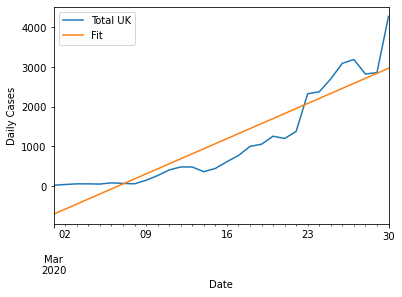

In [23]:
ax = covid_march.plot(x='date', y='newCasesBySpecimenDate', label='Total UK')
covid_march.plot(x='date', y='casesFit', label='Fit', ax=ax)
plt.xlabel('Date')
plt.ylabel('Daily Cases')

## Exercise: Higher degree polynomial fit

This doesn't look like a great fit, explore using higher polynomials the fit the data better.  

What are the problems of using higher degree polynomials to fit the data?

In discussing the number of daily cases we are often told that the growth is exponential.  Can we use what we have been exploring to fit an exponential to the data?

We expect an exponential to have the form

$$
y =  A\exp^{(Bx)}
$$

if we take natural logs of both sides we have:

$$
\ln y = \ln (A) + Bx.
$$

So if we fit $\ln(y)$ against $x$ the intercept will be $\ln A$ and the gradient $B$:

In [29]:
fitexpcoeff = np.polyfit(x=covid_march.index, y=np.log(covid_march['newCasesBySpecimenDate']),deg=1)
fitexpcoeff

array([0.17704781, 3.58231434])

As we did with the previous fit we can now add a new column calculating the fitted exponential value by noting that $A$ will be given by the exponential of the intercept of the fit i.e, $A = \exp^{\mathrm{intercept}}$ and $B$ will be the calculated gradient:

In [33]:
def fitexp(x, coeff):
    return np.exp(coeff[1]) * np.exp(coeff[0]*x)

In [34]:
covid_march['casesFitexp']=fitexp(covid_march.index, fitexpcoeff)
covid_march.head()

,date,areaType,areaCode,areaName,cumCasesBySpecimenDate,cumDeaths28DaysByDeathDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate,casesFit,casesFitexp
0,2020-03-01,overview,K02000001,United Kingdom,71.0,NaN,22.0,0.0,-706.025806,35.956661
1,2020-03-02,overview,K02000001,United Kingdom,111.0,1.0,40.0,1.0,-579.375751,42.921040
2,2020-03-03,overview,K02000001,United Kingdom,167.0,3.0,56.0,2.0,-452.725695,51.234338
3,2020-03-04,overview,K02000001,United Kingdom,223.0,3.0,56.0,0.0,-326.075640,61.157822
4,2020-03-05,overview,K02000001,United Kingdom,274.0,6.0,51.0,3.0,-199.425584,73.003369


Text(0, 0.5, 'Daily Cases')

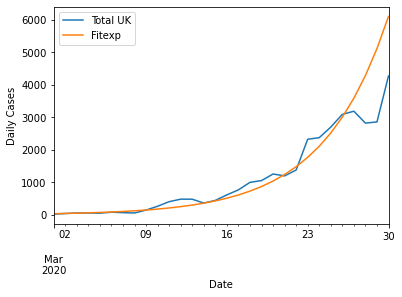

In [35]:
ax = covid_march.plot(x='date', y='newCasesBySpecimenDate', label='Total UK')
covid_march.plot(x='date', y='casesFitexp', label='Fitexp', ax=ax)
plt.xlabel('Date')
plt.ylabel('Daily Cases')

## Exercise: Your turn

Now it's over to you.  Explore the data using the skills and methods you have learnt and identify features that you want to discuss and comment on.  You could use the dataset provided, explore the government website to extract e.g. regional subsets of the data, or you could use completely different data.  Write up your findings in a notebook as if you were writing a lab report.  But include notebooks to include the code and data analysis so that someone else can follow not just your argument but the also repeat and reproduce your results.  The only constraint is that the data you use must be available on the internet so that the whole workflow can be re-run.

## Key Points:
* With `pandas` and `numpy` we can readily import data from a range of sources:
  1. manipulate the data to select ranges
  2. analyse the data e.g. adding fits
  3. plot the data to compare fits with the original data